In [1]:
# Load the "autoreload" extension
%load_ext autoreload

# always reload modules marked with "%aimport"
# see http://ipython.readthedocs.io/en/stable/config/extensions/autoreload.html?highlight=autoreload
%autoreload 2

In [2]:
import os
import sys
%matplotlib inline

In [3]:
sys.path.append(os.path.abspath( '../..'))
sys.path.append(os.path.abspath( '..'))

In [4]:
pack_dir = os.path.join(os.getcwd(), os.pardir, os.pardir)
sys.path.append(pack_dir)

In [5]:
src_dir = os.path.join(os.getcwd(), os.pardir, 'src')
sys.path.append(src_dir)

In [6]:
# import Py_Data_talk
# import Py_Data_talk.src.data
# from Py_Data_talk.src.data.generate_data import distribution1

In [7]:
from Py_Data_talk.src.data.generate_data import *

In [8]:
data = sample(distribution1,2000,scale=6)
x = data.coordinates
y = data.traffic.map({'normal':0,'slow':1})

In [9]:
#plot_traffic(data,size_point=8)

In [10]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.models import Model

Using TensorFlow backend.


In [11]:
# my_init = keras.initializers.RandomUniform(minval=-0.5, maxval=0.5, seed=None)
# h1 = 6
# sgd = keras.optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)

# model = Sequential()
# model.add(Dense(h1, input_dim=1,name='layer1',bias_initializer=my_init))
# model.add(Activation('relu',name='layer2'))
# model.add(Dense(1,name='layer3',bias_initializer=my_init))
# model.add(Activation('sigmoid',name='layer4'))

# layer_name = 'layer3'
# intermediate_layer_model = Model(inputs=model.input, outputs=model.get_layer(layer_name).output)

# model.compile(optimizer='sgd',
#               loss='binary_crossentropy',
#               metrics=['accuracy'])

In [12]:
def set_model(h1=6):
    my_init = keras.initializers.RandomUniform(minval=-0.5, maxval=0.5, seed=None)
    sgd = keras.optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)
    model = Sequential()
    model.add(Dense(h1, input_dim=1,name='layer1',bias_initializer=my_init))
    model.add(Activation('relu',name='layer2'))
    model.add(Dense(1,name='layer3',bias_initializer=my_init))
    model.add(Activation('sigmoid',name='layer4'))
    layer_name = 'layer3'
    intermediate_layer_model = Model(inputs=model.input, outputs=model.get_layer(layer_name).output)
    model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
    return model, intermediate_layer_model 

In [13]:
def plot_layer(start=0,end=100):
    domain = np.arange(start,end,0.1)
    domain_proc = proc(domain)
    PL_graph = intermediate_layer_model.predict(domain_proc)
    #plt.figure(figsize=(15,7))
    plt.plot(domain,PL_graph)
    #plt.show()
    #plt.show()
    #return None

In [14]:
def proc(x):
    return (x-50)/50
x_proc = proc(x)
#plt.scatter(x_proc,y)

In [15]:
data = sample(distribution1,2000,scale=6)
x = data.coordinates
x_proc = proc(x)
y = data.traffic.map({'normal':0,'slow':1})
x_proc = proc(x)
#plot_traffic(data,size_point=8)

In [16]:
def fit_and_plot(model,epochs=10,rounds=1,start=0,end=100):
    plt.figure(figsize=(19,15))    
    for i in range(1,rounds+1):
        plt.subplot(rounds//4 +1,4,i)
        #print('Round',i)
        model.fit(x_proc,y,epochs=epochs, batch_size=32,verbose=0)
        plot_layer(start,end)    
        plt.title('Round {}'.format(i))
    plt.tight_layout()
    plt.show()
    model.fit(x_proc,y,epochs=5, batch_size=128,verbose=1)
    plot_layer(start,end)    
    plt.title('Last round'.format(i))
    plt.show()

In [17]:
model, intermediate_layer_model = set_model(h1=10)
#plot_layer()
#model.summary()
#model.get_weights()

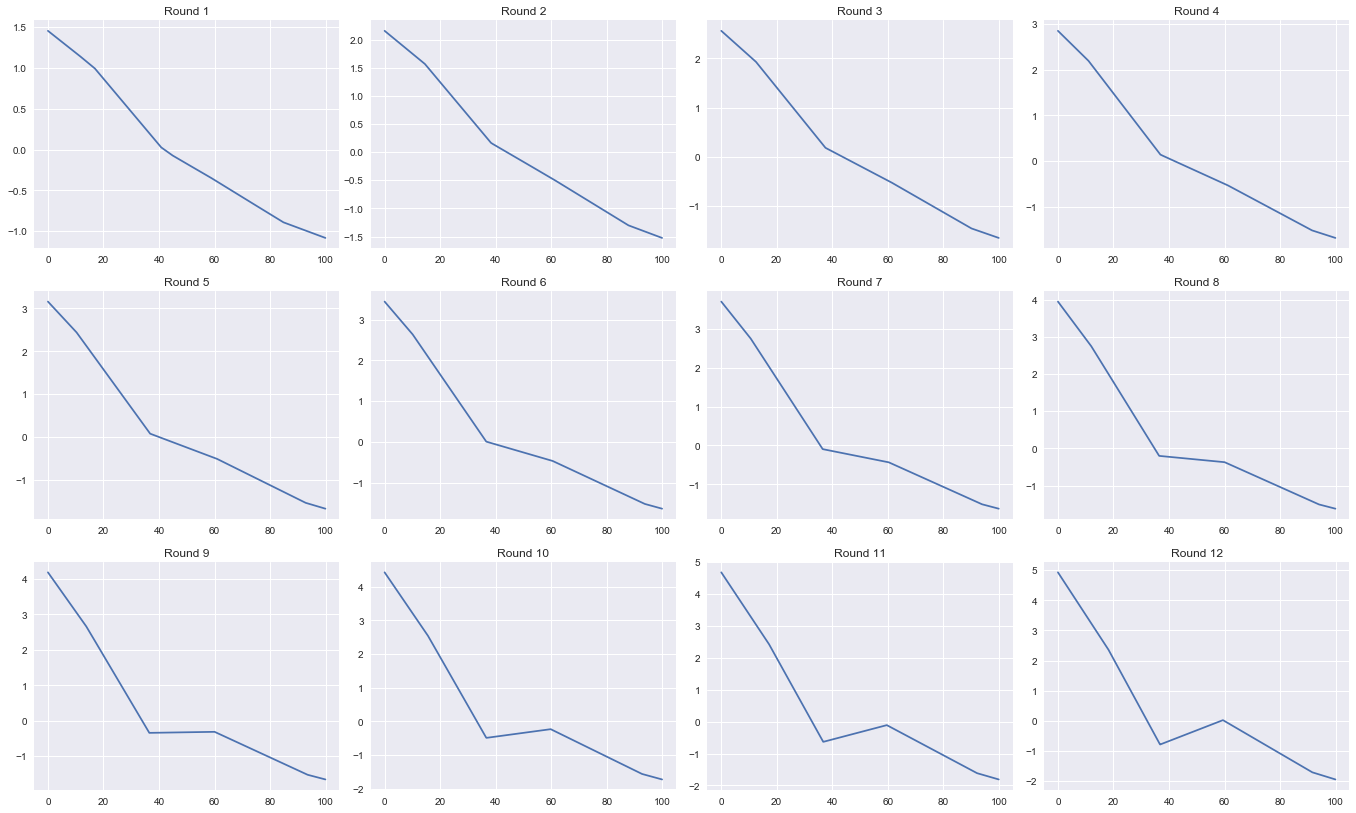

Epoch 1/5
2000/2000 [==============================] - 0s 14us/step - loss: 0.4538 - acc: 0.7400
Epoch 2/5
2000/2000 [==============================] - 0s 11us/step - loss: 0.4535 - acc: 0.7405
Epoch 3/5
2000/2000 [==============================] - 0s 10us/step - loss: 0.4532 - acc: 0.7485
Epoch 4/5
2000/2000 [==============================] - 0s 9us/step - loss: 0.4530 - acc: 0.7540
Epoch 5/5
2000/2000 [==============================] - 0s 9us/step - loss: 0.4527 - acc: 0.7585


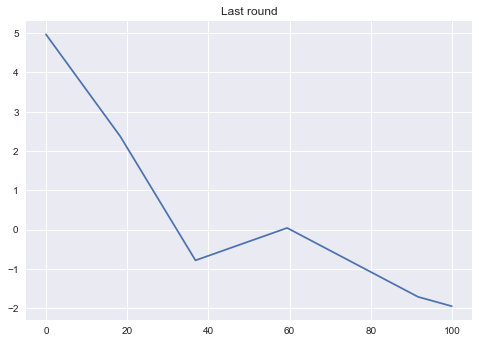

In [18]:
fit_and_plot(model,epochs = 20, rounds=12)

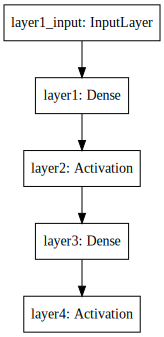

In [21]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [23]:
import pydot
import graphviz

In [24]:
from keras.utils import plot_model
plot_model(model, to_file='model1.png',show_shapes=True)